In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [109]:
sms = pd.read_csv('messages.csv',encoding='latin-1')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [110]:
sms.tail()

,subject,message,label
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0
2892,re : american - english in australia,hello ! i ' m working on a thesis concerning a...,0


In [111]:
sms.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [112]:
sms.columns


Index(['subject', 'message', 'label'], dtype='object')

In [113]:
# Removing the column of subject from the dataset
sms.drop(columns=['subject'],axis=1,inplace=True)

In [114]:
sms.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [115]:
sms.shape

(2893, 2)

In [116]:
print('\n',sms.label.value_counts())


 0    2412
1     481
Name: label, dtype: int64


In [117]:
#1 is the spam and 0 is the normal message

In [118]:
#New column for Length of message
sms['length'] = sms.message.str.len()
sms.head(5)

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [119]:
# Convert all messages to lower case
sms['message'] = sms['message'].str.lower()

In [120]:
sms.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [121]:
# Replace email addresses with 'email'
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
sms['message'] = sms['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [122]:
# Remove punctuation
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
sms['message'] = sms['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$', '')

In [123]:
sms.head()

,message,label,length
0,content length numbr apple iss research center...,0,2856
1,lang classification grimes joseph e and barbar...,0,1800
2,i am posting this inquiry for sergei atamas sa...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [124]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

sms['message'] = sms['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [125]:
# New column (clean_length) after puncuations,stopwords removal
sms['clean_length'] = sms.message.str.len()
sms.head()

,message,label,length,clean_length
0,content length numbr apple iss research center...,0,2856,2179
1,lang classification grimes joseph e barbara f ...,0,1800,1454
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,629


In [126]:
# Total length removal
print ('Original Length', sms.length.sum())
print ('Clean Length', sms.clean_length.sum())

Original Length 9070005
Clean Length 6568010


In [127]:
# In original and and the clean length you see the difference is 2501995 

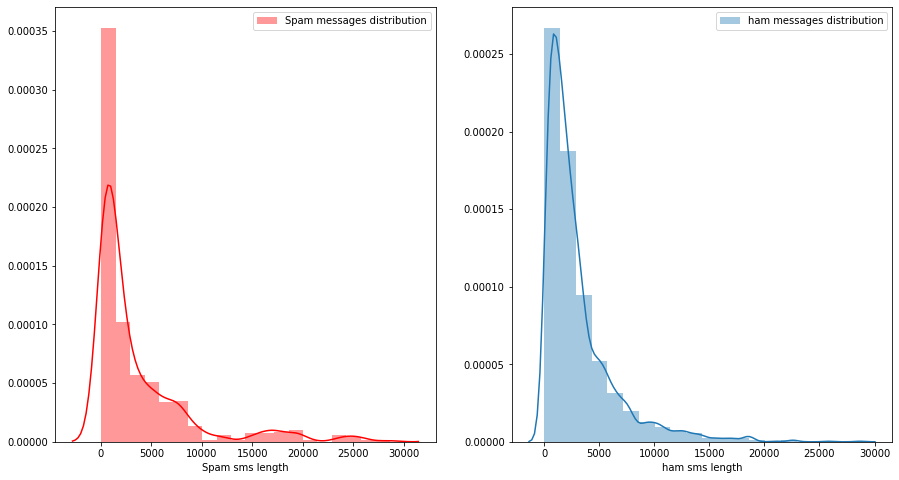

In [128]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

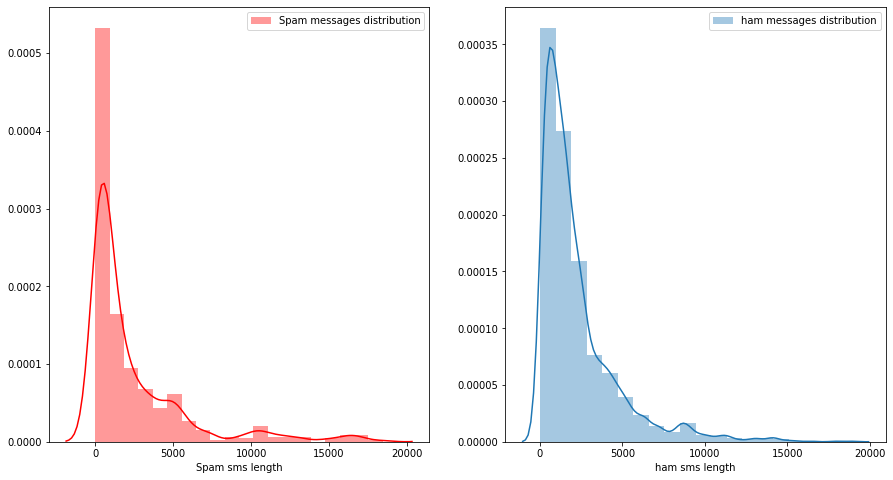

In [129]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

In [130]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


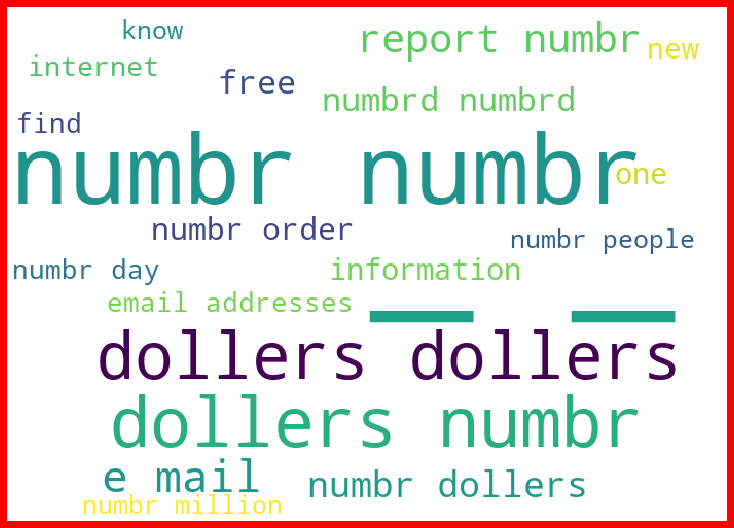

In [131]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

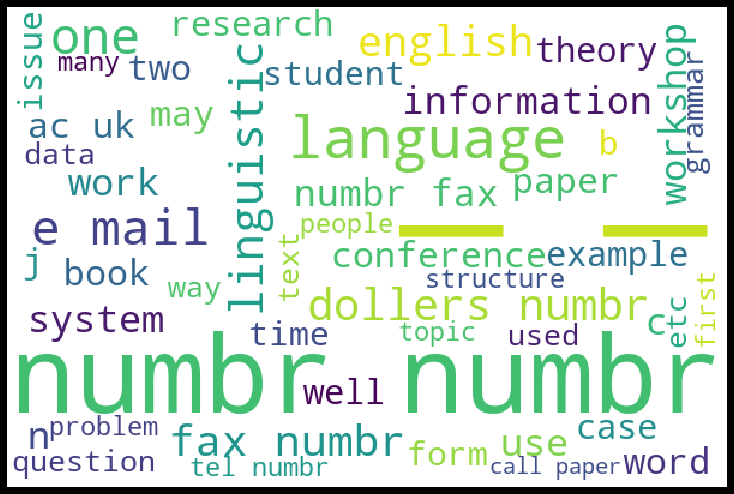

In [132]:
#Getting sense of loud words in ham 

hams = sms['message'][sms['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [133]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(sms['message'])

X = features
y = sms['label']

In [134]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


In [135]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



In [137]:
conf_mat = confusion_matrix(y_test,y_pred)

In [138]:
conf_mat

array([[585,   0],
       [120,  19]], dtype=int64)

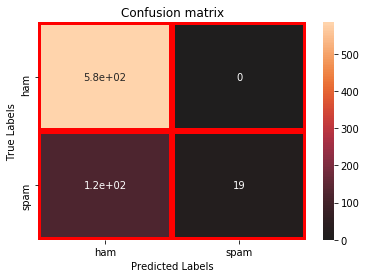

In [139]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()